In [ ]:
#!git clone https://github.com/divamgupta/image-segmentation-keras
!git clone https://github.com/rajeevratan84/image-segmentation-keras.git

Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 1165, done.
remote: Total 1165 (delta 0), reused 0 (delta 0), pack-reused 1165
Receiving objects: 100% (1165/1165), 3.29 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (752/752), done.


In [ ]:
!pip install pkgconfig

In [ ]:
# !pip install h5py
!pip install Cython==0.29.36

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


In [ ]:
%cd image-segmentation-keras
!python setup.py install

/content/image-segmentation-keras
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ************************************************

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
r_iworking_directory = '/content/drive/MyDrive/DLproject'
original_img_dic = f'{working_directory}/original_images/'
# masked_img_dic = f'{working_directory}/RGB_color_image_masks/RGB_color_image_masks/'
masked_img_dic = f'{working_directory}/label_images_semantic/'

In [ ]:
# # final_h,final_w = 96,128
# # final_h,final_w = 512,512
# final_h,final_w = 384,512
# org_image_list = os.listdir(original_img_dic)
# masked_image_list = os.listdir(masked_img_dic)
# org_image_list = sorted([original_img_dic+i for i in org_image_list])
# masked_image_list = sorted([masked_img_dic+i for i in masked_image_list])

# train_org_image_list = org_image_list[:350]
# train_masked_image_list = masked_image_list[:350]

# test_org_image_list = org_image_list[350:400]
# test_masked_image_list = masked_image_list[350:400]
# # for i in range(len(train_org_image_list)):

#   #  print(train_org_image_list[i],train_masked_image_list[i])
# # x = np.random.randint((0,400))

# # n = 222
# # org_image = img.imread(train_org_image_list[n])
# # print(org_image.shape)
# # masked_image = img.imread(train_masked_image_list[n])
# # print(masked_image.shape)

# # fig ,arr  = plt.subplots(1,2,figsize=(15,10))
# # arr[0].imshow(org_image)
# # arr[0].set_title('Original Image')
# # arr[1].imshow(masked_image)
# # arr[1].set_title('Mask')
# # plt.show()

# # def resize(org_image,masked_image) :
# #     org_image = tf.image.resize(org_image,(512,512),method='nearest')
# #     masked_image = tf.image.resize(masked_image,(512,512),method='nearest')
# #     return org_image , masked_image

# # i,j = resize(org_image,masked_image)

# # print(i.shape)
# # # masked_image = img.imread(train_masked_image_list[n])
# # print(j.shape)

# # fig ,arr  = plt.subplots(1,2,figsize=(15,10))
# # arr[0].imshow(i)
# # arr[0].set_title('Original Image after resize')
# # arr[1].imshow(j)
# # arr[1].set_title('Masked image after resize')
# # plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv(f'{working_directory}/class_dict_seg.csv')
df.head()

name    r    g    b
0   unlabeled    0    0    0
1  paved-area  128   64  128
2        dirt  130   76    0
3       grass    0  102    0
4      gravel  112  103   87

In [ ]:
df.name

0       unlabeled
1      paved-area
2            dirt
3           grass
4          gravel
5           water
6           rocks
7            pool
8      vegetation
9            roof
10           wall
11         window
12           door
13          fence
14     fence-pole
15         person
16            dog
17            car
18        bicycle
19           tree
20      bald-tree
21      ar-marker
22       obstacle
23    conflicting
Name: name, dtype: object

In [ ]:
class_list = df.name.values.tolist()
print(class_list)
len(class_list)

['unlabeled', 'paved-area', 'dirt', 'grass', 'gravel', 'water', 'rocks', 'pool', 'vegetation', 'roof', 'wall', 'window', 'door', 'fence', 'fence-pole', 'person', 'dog', 'car', 'bicycle', 'tree', 'bald-tree', 'ar-marker', 'obstacle', 'conflicting']


24

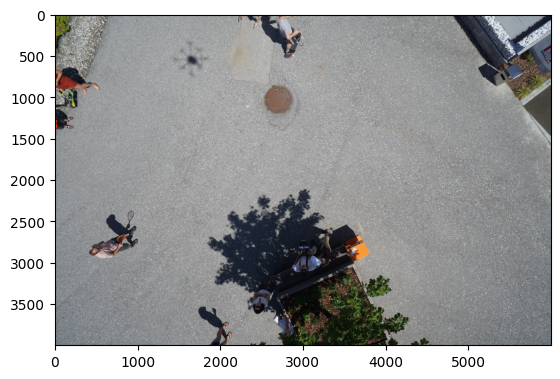

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# original image
image = Image.open(f'{original_img_dic}/000.jpg')
image = np.array(image)
plt.imshow(image)

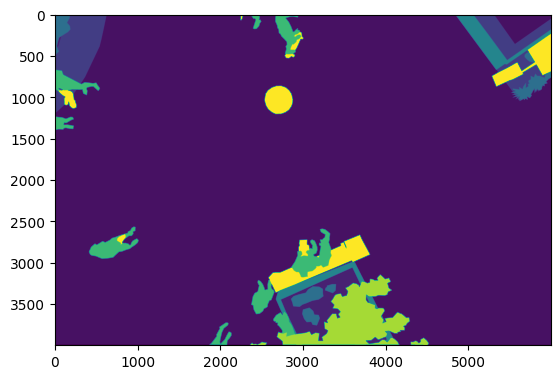

In [ ]:
# label image
label = Image.open(f'{masked_img_dic}/000.png')
label = np.array(label)
plt.imshow(label)

In [ ]:
image.shape, label.shape

((4000, 6000, 3), (4000, 6000))

In [ ]:
image.min(), image.max()

(0, 255)

In [ ]:
label.min(), label.max()

(0, 22)

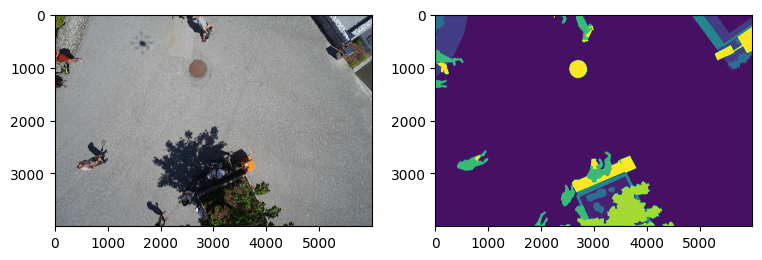

In [ ]:
plt.figure(figsize = (9, 4))

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(label)

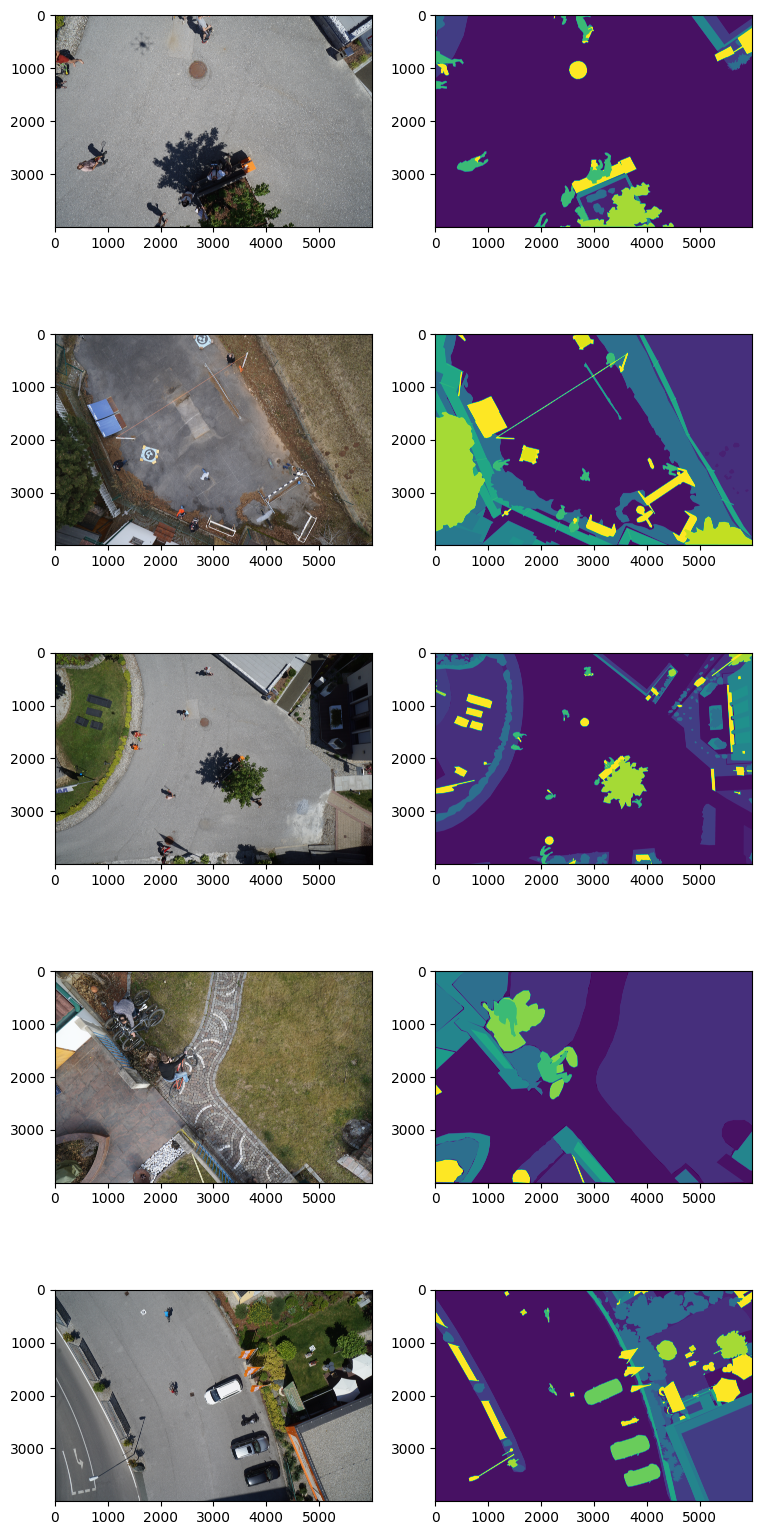

In [ ]:
# 5 pairs of original and label images
n_max_imgs = 5

plt.figure(figsize = (9, 20))
for n in range(n_max_imgs):

    image = Image.open(f'{original_img_dic}/00{n}.jpg')
    image = np.array(image)

    label = Image.open(f'{masked_img_dic}/00{n}.png')
    label = np.array(label)

    plt.subplot(n_max_imgs, 2, 2 * n + 1)
    plt.imshow(image)

    plt.subplot(n_max_imgs, 2, 2 * n + 2)
    plt.imshow(label)

In [ ]:
from glob import glob
images = sorted(glob(f'{original_img_dic}/*.jpg'))
#print(images)

In [ ]:
len(images)

400

In [ ]:
labels = sorted(glob(f'{masked_img_dic}/*.png'))
#print(labels)

In [ ]:
len(labels)

400

In [ ]:
from sklearn.model_selection import train_test_split
import os

# Define the paths to the image and annotation directories.
image_dir = original_img_dic
annotation_dir = masked_img_dic

# Get a list of all the image files.
image_files = os.listdir(image_dir)

# Split the data into a training set and a validation set.
train_files, val_files = train_test_split(image_files, test_size = 0.2, random_state = 42)

# Define the paths to the training and validation directories.
train_images = [os.path.join(image_dir, file) for file in train_files]
train_annotations = [os.path.join(annotation_dir, os.path.splitext(file)[0] + '.png') for file in train_files]
val_images = [os.path.join(image_dir, file) for file in val_files]
val_annotations = [os.path.join(annotation_dir, os.path.splitext(file)[0] + '.png') for file in val_files]

In [ ]:
import shutil

# Define the destination directory.
destination_dir = '/content/working/train_images'

# Create the destination directory if it doesn't exist.
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the images to the destination directory.
for path in train_images:
    shutil.copy2(path, destination_dir)

In [ ]:
# Define the destination directory.
destination_dir = '/content/working/train_annotations'

# Create the destination directory if it doesn't exist.
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the images to the destination directory.
for path in train_annotations:
    shutil.copy2(path, destination_dir)

In [ ]:
# Define the destination directory.
destination_dir = '/content/working/val_images'

# Create the destination directory if it doesn't exist.
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the images to the destination directory.
for path in val_images:
    shutil.copy2(path, destination_dir)

In [ ]:
# Define the destination directory.
destination_dir = '/content/working/val_annotations'

# Create the destination directory if it doesn't exist.
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the images to the destination directory.
for path in val_annotations:
    shutil.copy2(path, destination_dir)

In [ ]:
from keras_segmentation.models.segnet import segnet

model = segnet(n_classes = len(class_list), input_height = 512, input_width = 512)

In [ ]:
import tensorflow as tf

# Train the model using the training set and validate using the validation set
callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)

model.train(train_images = '/content/working/train_images', train_annotations = '/content/working/train_annotations',
            val_images = '/content/working/val_images', val_annotations = '/content/working/val_annotations',
            checkpoints_path = '/tmp/vgg_unet_1', steps_per_epoch = 40, epochs = 100, callbacks = callback)

Verifying training dataset


100%|██████████| 320/320 [03:58<00:00,  1.34it/s]


Dataset verified! 
Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 2.4377 - accuracy: 0.4166

40/40 [==============================] - 71s 1s/step - loss: 2.4377 - accuracy: 0.4166
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 2.1515 - accuracy: 0.4909

40/40 [==============================] - 60s 1s/step - loss: 2.1515 - accuracy: 0.4909
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 2.1149 - accuracy: 0.4882

40/40 [==============================] - 58s 1s/step - loss: 2.1149 - accuracy: 0.4882
Epoch 4/100
40/40 [==============================] - ETA: 0s - loss: 1.8552 - accuracy: 0.5185

40/40 [==============================] - 61s 2s/step - loss: 1.8552 - accuracy: 0.5185
Epoch 5/100
40/40 [==============================] - ETA: 0s - loss: 1.7217 - accuracy: 0.5229

40/40 [==============================] - 63s 2s/step - loss: 1.7217 - accuracy: 0.5229
Epoch 6/100
40/40 [==============================] - ETA: 0s - loss: 1.7085 - accuracy: 0.5414

40/40 [==============================] - 62s 2s/step - loss: 1.7085 - accuracy: 0.5414
Epoch 7/100
40/40 [==============================] - ETA: 0s - loss: 1.6690 - accuracy: 0.5175

40/40 [==============================] - 64s 2s/step - loss: 1.6690 - accuracy: 0.5175
Epoch 8/100
40/40 [==============================] - ETA: 0s - loss: 1.5661 - accuracy: 0.5696

40/40 [==============================] - 63s 2s/step - loss: 1.5661 - accuracy: 0.5696
Epoch 9/100
40/40 [==============================] - ETA: 0s - loss: 1.5220 - accuracy: 0.5598

40/40 [==============================] - 58s 1s/step - loss: 1.5220 - accuracy: 0.5598
Epoch 10/100
40/40 [==============================] - ETA: 0s - loss: 1.5310 - accuracy: 0.5733

40/40 [==============================] - 60s 1s/step - loss: 1.5310 - accuracy: 0.5733
Epoch 11/100
40/40 [==============================] - ETA: 0s - loss: 1.5112 - accuracy: 0.5429

40/40 [==============================] - 60s 1s/step - loss: 1.5112 - accuracy: 0.5429
Epoch 12/100
40/40 [==============================] - ETA: 0s - loss: 1.5225 - accuracy: 0.5715

40/40 [==============================] - 59s 1s/step - loss: 1.5225 - accuracy: 0.5715
Epoch 13/100
40/40 [==============================] - ETA: 0s - loss: 1.4607 - accuracy: 0.5761

40/40 [==============================] - 59s 1s/step - loss: 1.4607 - accuracy: 0.5761
Epoch 14/100
40/40 [==============================] - ETA: 0s - loss: 1.4780 - accuracy: 0.5841

40/40 [==============================] - 58s 1s/step - loss: 1.4780 - accuracy: 0.5841
Epoch 15/100
40/40 [==============================] - ETA: 0s - loss: 1.4651 - accuracy: 0.5573

40/40 [==============================] - 60s 2s/step - loss: 1.4651 - accuracy: 0.5573
Epoch 16/100
40/40 [==============================] - ETA: 0s - loss: 1.4378 - accuracy: 0.5984

40/40 [==============================] - 57s 1s/step - loss: 1.4378 - accuracy: 0.5984
Epoch 17/100
40/40 [==============================] - ETA: 0s - loss: 1.4102 - accuracy: 0.5963

40/40 [==============================] - 59s 1s/step - loss: 1.4102 - accuracy: 0.5963
Epoch 18/100
40/40 [==============================] - ETA: 0s - loss: 1.4393 - accuracy: 0.5946

40/40 [==============================] - 58s 1s/step - loss: 1.4393 - accuracy: 0.5946
Epoch 19/100
40/40 [==============================] - ETA: 0s - loss: 1.4191 - accuracy: 0.5695

40/40 [==============================] - 59s 1s/step - loss: 1.4191 - accuracy: 0.5695
Epoch 20/100
40/40 [==============================] - ETA: 0s - loss: 1.3774 - accuracy: 0.6171

40/40 [==============================] - 57s 1s/step - loss: 1.3774 - accuracy: 0.6171
Epoch 21/100
40/40 [==============================] - ETA: 0s - loss: 1.3721 - accuracy: 0.6112

40/40 [==============================] - 59s 1s/step - loss: 1.3721 - accuracy: 0.6112
Epoch 22/100
40/40 [==============================] - ETA: 0s - loss: 1.3881 - accuracy: 0.6045

40/40 [==============================] - 59s 1s/step - loss: 1.3881 - accuracy: 0.6045
Epoch 23/100
40/40 [==============================] - ETA: 0s - loss: 1.3947 - accuracy: 0.5791

40/40 [==============================] - 60s 1s/step - loss: 1.3947 - accuracy: 0.5791
Epoch 24/100
40/40 [==============================] - ETA: 0s - loss: 1.3259 - accuracy: 0.6290

40/40 [==============================] - 57s 1s/step - loss: 1.3259 - accuracy: 0.6290
Epoch 25/100
40/40 [==============================] - ETA: 0s - loss: 1.3347 - accuracy: 0.6176

40/40 [==============================] - 60s 1s/step - loss: 1.3347 - accuracy: 0.6176
Epoch 26/100
40/40 [==============================] - ETA: 0s - loss: 1.3275 - accuracy: 0.6193

40/40 [==============================] - 59s 1s/step - loss: 1.3275 - accuracy: 0.6193
Epoch 27/100
40/40 [==============================] - ETA: 0s - loss: 1.3440 - accuracy: 0.5987

40/40 [==============================] - 60s 1s/step - loss: 1.3440 - accuracy: 0.5987
Epoch 28/100
40/40 [==============================] - ETA: 0s - loss: 1.2889 - accuracy: 0.6391

40/40 [==============================] - 59s 1s/step - loss: 1.2889 - accuracy: 0.6391
Epoch 29/100
40/40 [==============================] - ETA: 0s - loss: 1.3050 - accuracy: 0.6234

40/40 [==============================] - 59s 1s/step - loss: 1.3050 - accuracy: 0.6234
Epoch 30/100
40/40 [==============================] - ETA: 0s - loss: 1.2675 - accuracy: 0.6350

40/40 [==============================] - 59s 1s/step - loss: 1.2675 - accuracy: 0.6350
Epoch 31/100
40/40 [==============================] - ETA: 0s - loss: 1.3003 - accuracy: 0.6146

40/40 [==============================] - 59s 1s/step - loss: 1.3003 - accuracy: 0.6146
Epoch 32/100
40/40 [==============================] - ETA: 0s - loss: 1.2680 - accuracy: 0.6387

40/40 [==============================] - 59s 1s/step - loss: 1.2680 - accuracy: 0.6387
Epoch 33/100
40/40 [==============================] - ETA: 0s - loss: 1.2720 - accuracy: 0.6316

40/40 [==============================] - 58s 1s/step - loss: 1.2720 - accuracy: 0.6316
Epoch 34/100
40/40 [==============================] - ETA: 0s - loss: 1.1958 - accuracy: 0.6506

40/40 [==============================] - 59s 1s/step - loss: 1.1958 - accuracy: 0.6506
Epoch 35/100
40/40 [==============================] - ETA: 0s - loss: 1.2669 - accuracy: 0.6294

40/40 [==============================] - 58s 1s/step - loss: 1.2669 - accuracy: 0.6294
Epoch 36/100
40/40 [==============================] - ETA: 0s - loss: 1.2141 - accuracy: 0.6546

40/40 [==============================] - 60s 1s/step - loss: 1.2141 - accuracy: 0.6546
Epoch 37/100
40/40 [==============================] - ETA: 0s - loss: 1.2290 - accuracy: 0.6434

40/40 [==============================] - 58s 1s/step - loss: 1.2290 - accuracy: 0.6434
Epoch 38/100
40/40 [==============================] - ETA: 0s - loss: 1.1365 - accuracy: 0.6700

40/40 [==============================] - 60s 2s/step - loss: 1.1365 - accuracy: 0.6700
Epoch 39/100
40/40 [==============================] - ETA: 0s - loss: 1.2272 - accuracy: 0.6407

40/40 [==============================] - 58s 1s/step - loss: 1.2272 - accuracy: 0.6407
Epoch 40/100
40/40 [==============================] - ETA: 0s - loss: 1.1782 - accuracy: 0.6645

40/40 [==============================] - 60s 2s/step - loss: 1.1782 - accuracy: 0.6645
Epoch 41/100
40/40 [==============================] - ETA: 0s - loss: 1.1952 - accuracy: 0.6500

40/40 [==============================] - 61s 2s/step - loss: 1.1952 - accuracy: 0.6500
Epoch 42/100
40/40 [==============================] - ETA: 0s - loss: 1.0885 - accuracy: 0.6863

40/40 [==============================] - 61s 2s/step - loss: 1.0885 - accuracy: 0.6863
Epoch 43/100
40/40 [==============================] - ETA: 0s - loss: 1.1724 - accuracy: 0.6554

40/40 [==============================] - 61s 2s/step - loss: 1.1724 - accuracy: 0.6554
Epoch 44/100
40/40 [==============================] - ETA: 0s - loss: 1.1436 - accuracy: 0.6751

40/40 [==============================] - 60s 1s/step - loss: 1.1436 - accuracy: 0.6751
Epoch 45/100
40/40 [==============================] - ETA: 0s - loss: 1.1637 - accuracy: 0.6609

40/40 [==============================] - 61s 2s/step - loss: 1.1637 - accuracy: 0.6609
Epoch 46/100
40/40 [==============================] - ETA: 0s - loss: 1.0563 - accuracy: 0.6975

40/40 [==============================] - 60s 1s/step - loss: 1.0563 - accuracy: 0.6975
Epoch 47/100
40/40 [==============================] - ETA: 0s - loss: 1.1668 - accuracy: 0.6563

40/40 [==============================] - 61s 2s/step - loss: 1.1668 - accuracy: 0.6563
Epoch 48/100
40/40 [==============================] - ETA: 0s - loss: 1.1391 - accuracy: 0.6777

40/40 [==============================] - 60s 2s/step - loss: 1.1391 - accuracy: 0.6777
Epoch 49/100
40/40 [==============================] - ETA: 0s - loss: 1.1361 - accuracy: 0.6675

40/40 [==============================] - 60s 1s/step - loss: 1.1361 - accuracy: 0.6675
Epoch 50/100
40/40 [==============================] - ETA: 0s - loss: 1.0283 - accuracy: 0.7058

40/40 [==============================] - 61s 2s/step - loss: 1.0283 - accuracy: 0.7058
Epoch 51/100
40/40 [==============================] - ETA: 0s - loss: 1.0869 - accuracy: 0.6818

40/40 [==============================] - 59s 1s/step - loss: 1.0869 - accuracy: 0.6818
Epoch 52/100
40/40 [==============================] - ETA: 0s - loss: 1.0874 - accuracy: 0.6921

40/40 [==============================] - 61s 2s/step - loss: 1.0874 - accuracy: 0.6921
Epoch 53/100
40/40 [==============================] - ETA: 0s - loss: 1.1105 - accuracy: 0.6783

40/40 [==============================] - 58s 1s/step - loss: 1.1105 - accuracy: 0.6783
Epoch 54/100
40/40 [==============================] - ETA: 0s - loss: 0.9986 - accuracy: 0.7116

40/40 [==============================] - 60s 2s/step - loss: 0.9986 - accuracy: 0.7116
Epoch 55/100
40/40 [==============================] - ETA: 0s - loss: 1.0789 - accuracy: 0.6841

40/40 [==============================] - 59s 1s/step - loss: 1.0789 - accuracy: 0.6841
Epoch 56/100
40/40 [==============================] - ETA: 0s - loss: 1.0687 - accuracy: 0.6969

40/40 [==============================] - 60s 1s/step - loss: 1.0687 - accuracy: 0.6969
Epoch 57/100
40/40 [==============================] - ETA: 0s - loss: 1.0771 - accuracy: 0.6868

40/40 [==============================] - 60s 1s/step - loss: 1.0771 - accuracy: 0.6868
Epoch 58/100
40/40 [==============================] - ETA: 0s - loss: 0.9726 - accuracy: 0.7193

40/40 [==============================] - 59s 1s/step - loss: 0.9726 - accuracy: 0.7193
Epoch 59/100
40/40 [==============================] - ETA: 0s - loss: 1.0288 - accuracy: 0.6962

40/40 [==============================] - 60s 2s/step - loss: 1.0288 - accuracy: 0.6962
Epoch 60/100
40/40 [==============================] - ETA: 0s - loss: 1.0304 - accuracy: 0.7087

40/40 [==============================] - 58s 1s/step - loss: 1.0304 - accuracy: 0.7087
Epoch 61/100
40/40 [==============================] - ETA: 0s - loss: 1.0523 - accuracy: 0.6931

40/40 [==============================] - 60s 2s/step - loss: 1.0523 - accuracy: 0.6931
Epoch 62/100
40/40 [==============================] - ETA: 0s - loss: 0.9547 - accuracy: 0.7227

40/40 [==============================] - 57s 1s/step - loss: 0.9547 - accuracy: 0.7227
Epoch 63/100
40/40 [==============================] - ETA: 0s - loss: 1.0057 - accuracy: 0.7006

40/40 [==============================] - 57s 1s/step - loss: 1.0057 - accuracy: 0.7006
Epoch 64/100
40/40 [==============================] - ETA: 0s - loss: 0.9957 - accuracy: 0.7144

40/40 [==============================] - 56s 1s/step - loss: 0.9957 - accuracy: 0.7144
Epoch 65/100
40/40 [==============================] - ETA: 0s - loss: 1.0262 - accuracy: 0.7019

40/40 [==============================] - 57s 1s/step - loss: 1.0262 - accuracy: 0.7019
Epoch 66/100
40/40 [==============================] - ETA: 0s - loss: 0.9333 - accuracy: 0.7282

40/40 [==============================] - 57s 1s/step - loss: 0.9333 - accuracy: 0.7282
Epoch 67/100
40/40 [==============================] - ETA: 0s - loss: 0.9820 - accuracy: 0.7082

40/40 [==============================] - 57s 1s/step - loss: 0.9820 - accuracy: 0.7082
Epoch 68/100
40/40 [==============================] - ETA: 0s - loss: 0.9732 - accuracy: 0.7205

40/40 [==============================] - 58s 1s/step - loss: 0.9732 - accuracy: 0.7205
Epoch 69/100
40/40 [==============================] - ETA: 0s - loss: 1.0014 - accuracy: 0.7087

40/40 [==============================] - 56s 1s/step - loss: 1.0014 - accuracy: 0.7087
Epoch 70/100
40/40 [==============================] - ETA: 0s - loss: 0.9098 - accuracy: 0.7351

40/40 [==============================] - 58s 1s/step - loss: 0.9098 - accuracy: 0.7351
Epoch 71/100
40/40 [==============================] - ETA: 0s - loss: 0.9464 - accuracy: 0.7176

40/40 [==============================] - 56s 1s/step - loss: 0.9464 - accuracy: 0.7176
Epoch 72/100
40/40 [==============================] - ETA: 0s - loss: 0.9356 - accuracy: 0.7300

40/40 [==============================] - 58s 1s/step - loss: 0.9356 - accuracy: 0.7300
Epoch 73/100
40/40 [==============================] - ETA: 0s - loss: 0.9637 - accuracy: 0.7197

40/40 [==============================] - 56s 1s/step - loss: 0.9637 - accuracy: 0.7197
Epoch 74/100
40/40 [==============================] - ETA: 0s - loss: 0.8750 - accuracy: 0.7448

40/40 [==============================] - 58s 1s/step - loss: 0.8750 - accuracy: 0.7448
Epoch 75/100
40/40 [==============================] - ETA: 0s - loss: 0.9375 - accuracy: 0.7190

40/40 [==============================] - 56s 1s/step - loss: 0.9375 - accuracy: 0.7190
Epoch 76/100
40/40 [==============================] - ETA: 0s - loss: 0.9037 - accuracy: 0.7369

40/40 [==============================] - 59s 1s/step - loss: 0.9037 - accuracy: 0.7369
Epoch 77/100
40/40 [==============================] - ETA: 0s - loss: 0.9399 - accuracy: 0.7255

40/40 [==============================] - 56s 1s/step - loss: 0.9399 - accuracy: 0.7255
Epoch 78/100
40/40 [==============================] - ETA: 0s - loss: 0.8446 - accuracy: 0.7535

40/40 [==============================] - 59s 1s/step - loss: 0.8446 - accuracy: 0.7535
Epoch 79/100
40/40 [==============================] - ETA: 0s - loss: 0.9095 - accuracy: 0.7292

40/40 [==============================] - 56s 1s/step - loss: 0.9095 - accuracy: 0.7292
Epoch 80/100
40/40 [==============================] - ETA: 0s - loss: 0.8716 - accuracy: 0.7469

40/40 [==============================] - 58s 1s/step - loss: 0.8716 - accuracy: 0.7469
Epoch 81/100
40/40 [==============================] - ETA: 0s - loss: 0.8941 - accuracy: 0.7373

40/40 [==============================] - 57s 1s/step - loss: 0.8941 - accuracy: 0.7373
Epoch 82/100
40/40 [==============================] - ETA: 0s - loss: 0.8220 - accuracy: 0.7594

40/40 [==============================] - 58s 1s/step - loss: 0.8220 - accuracy: 0.7594
Epoch 83/100
40/40 [==============================] - ETA: 0s - loss: 0.8714 - accuracy: 0.7412

40/40 [==============================] - 57s 1s/step - loss: 0.8714 - accuracy: 0.7412
Epoch 84/100
40/40 [==============================] - ETA: 0s - loss: 0.8642 - accuracy: 0.7465

40/40 [==============================] - 57s 1s/step - loss: 0.8642 - accuracy: 0.7465
Epoch 85/100
40/40 [==============================] - ETA: 0s - loss: 0.8790 - accuracy: 0.7392

40/40 [==============================] - 57s 1s/step - loss: 0.8790 - accuracy: 0.7392
Epoch 86/100
40/40 [==============================] - ETA: 0s - loss: 0.8020 - accuracy: 0.7637

40/40 [==============================] - 57s 1s/step - loss: 0.8020 - accuracy: 0.7637
Epoch 87/100
40/40 [==============================] - ETA: 0s - loss: 0.8297 - accuracy: 0.7526

40/40 [==============================] - 58s 1s/step - loss: 0.8297 - accuracy: 0.7526
Epoch 88/100
40/40 [==============================] - ETA: 0s - loss: 0.8291 - accuracy: 0.7575

40/40 [==============================] - 57s 1s/step - loss: 0.8291 - accuracy: 0.7575
Epoch 89/100
40/40 [==============================] - ETA: 0s - loss: 0.8607 - accuracy: 0.7425

40/40 [==============================] - 58s 1s/step - loss: 0.8607 - accuracy: 0.7425
Epoch 90/100
40/40 [==============================] - ETA: 0s - loss: 0.7949 - accuracy: 0.7691

40/40 [==============================] - 57s 1s/step - loss: 0.7949 - accuracy: 0.7691
Epoch 91/100
40/40 [==============================] - ETA: 0s - loss: 0.8164 - accuracy: 0.7574

40/40 [==============================] - 59s 1s/step - loss: 0.8164 - accuracy: 0.7574
Epoch 92/100
40/40 [==============================] - ETA: 0s - loss: 0.7948 - accuracy: 0.7674

40/40 [==============================] - 58s 1s/step - loss: 0.7948 - accuracy: 0.7674
Epoch 93/100
40/40 [==============================] - ETA: 0s - loss: 0.8337 - accuracy: 0.7491

40/40 [==============================] - 60s 1s/step - loss: 0.8337 - accuracy: 0.7491
Epoch 94/100
40/40 [==============================] - ETA: 0s - loss: 0.7706 - accuracy: 0.7747

40/40 [==============================] - 59s 1s/step - loss: 0.7706 - accuracy: 0.7747
Epoch 95/100
40/40 [==============================] - ETA: 0s - loss: 0.7917 - accuracy: 0.7628

40/40 [==============================] - 59s 1s/step - loss: 0.7917 - accuracy: 0.7628
Epoch 96/100
40/40 [==============================] - ETA: 0s - loss: 0.7985 - accuracy: 0.7677

40/40 [==============================] - 58s 1s/step - loss: 0.7985 - accuracy: 0.7677
Epoch 97/100
40/40 [==============================] - ETA: 0s - loss: 0.8547 - accuracy: 0.7474

40/40 [==============================] - 59s 1s/step - loss: 0.8547 - accuracy: 0.7474
Epoch 98/100
40/40 [==============================] - ETA: 0s - loss: 0.7816 - accuracy: 0.7707

40/40 [==============================] - 59s 1s/step - loss: 0.7816 - accuracy: 0.7707
Epoch 99/100
40/40 [==============================] - ETA: 0s - loss: 0.7982 - accuracy: 0.7616

40/40 [==============================] - 58s 1s/step - loss: 0.7982 - accuracy: 0.7616
Epoch 100/100
40/40 [==============================] - ETA: 0s - loss: 0.7699 - accuracy: 0.7772

40/40 [==============================] - 58s 1s/step - loss: 0.7699 - accuracy: 0.7772


In [ ]:
model.save('semantic_segmentation_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pred = model.predict_segmentation(
    inp = val_images[0],
    out_fname = '/tmp/pred.jpg')

1/1 [==============================] - 1s 997ms/step


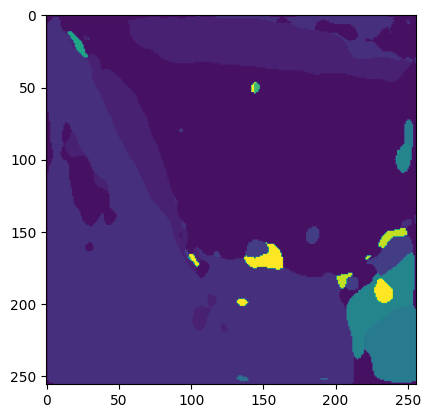

In [ ]:
plt.imshow(pred)

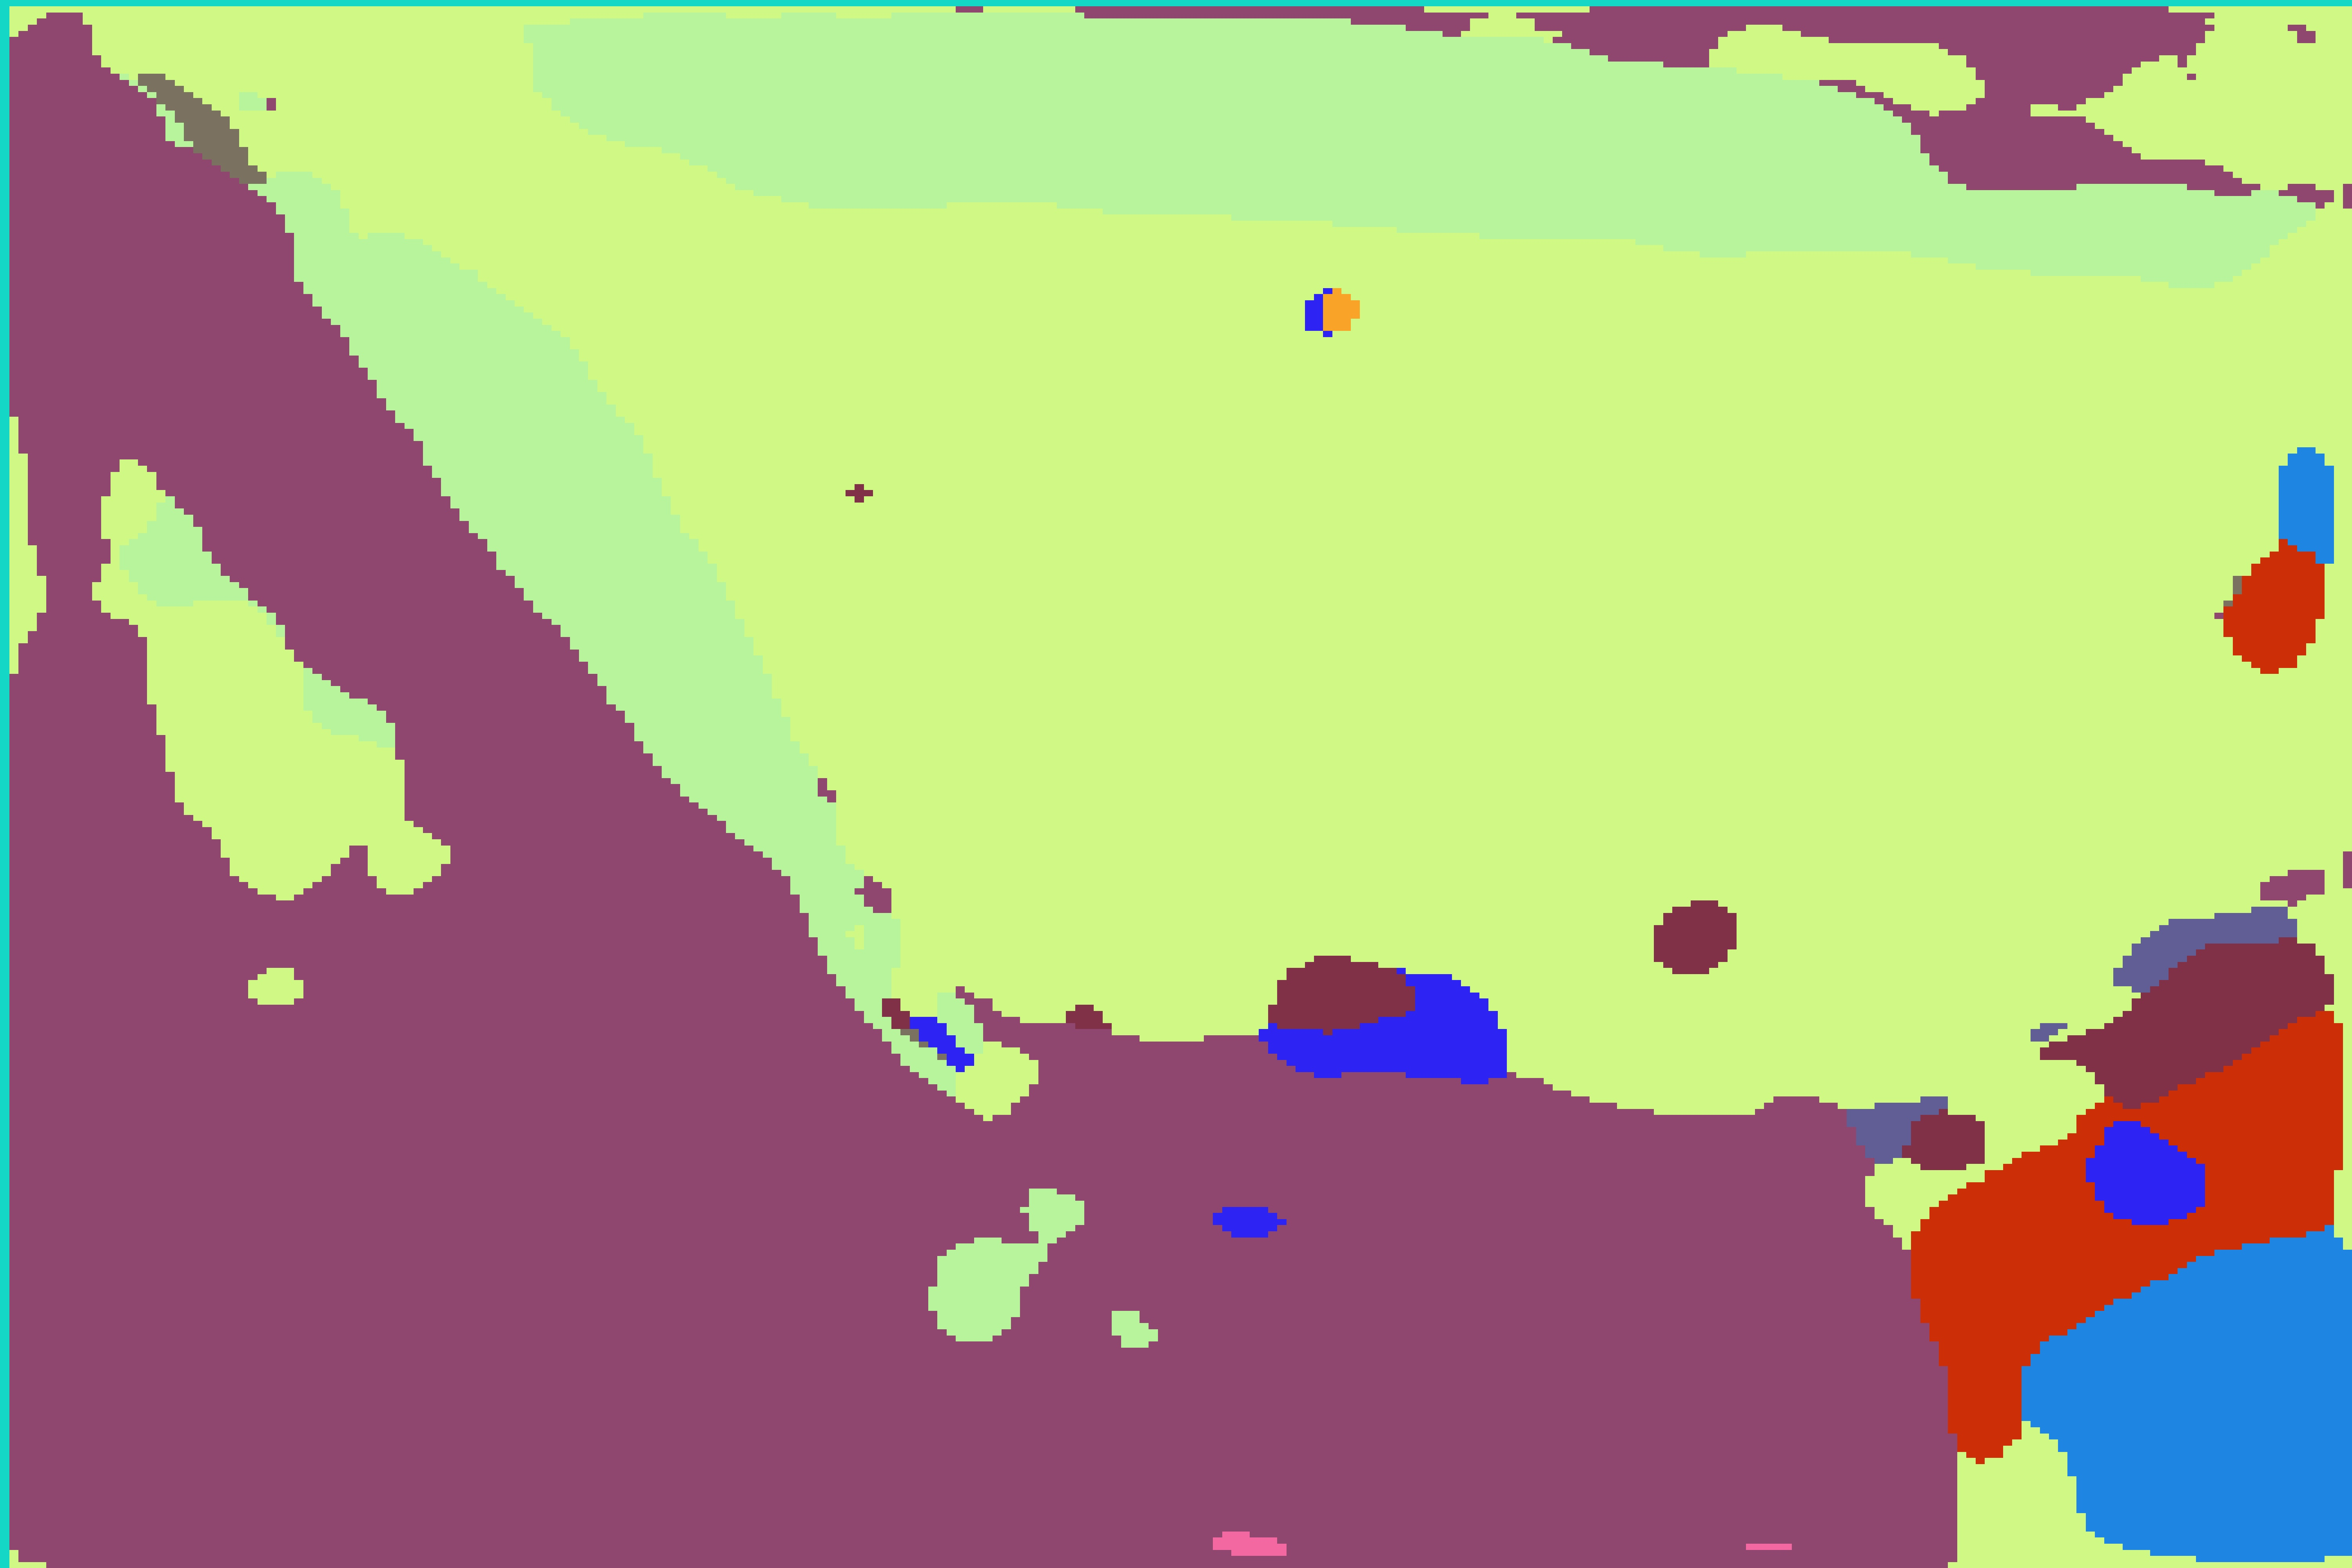

In [ ]:
from IPython.display import Image
Image('/tmp/pred.jpg')

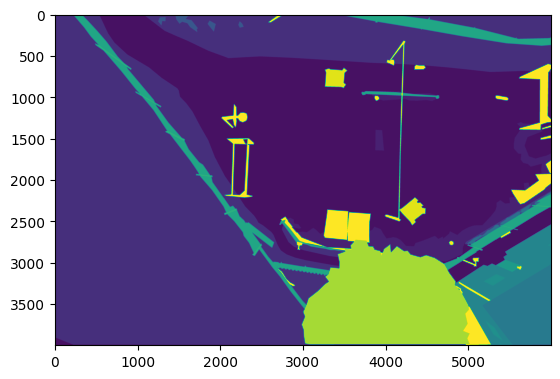

In [ ]:
from PIL import Image
truth = Image.open(val_annotations[0])
truth = np.array(truth)
plt.imshow(truth)

In [ ]:
pred_legend = model.predict_segmentation(
    inp = val_images[0],
    out_fname = '/tmp/pred.jpg' , overlay_img = True, show_legends = True,
    class_names = class_list)

1/1 [==============================] - 0s 26ms/step


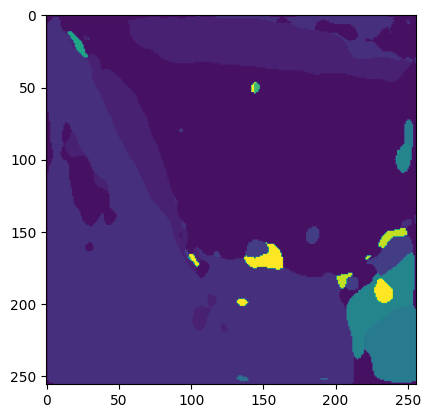

In [ ]:
plt.imshow(pred_legend)

In [ ]:
from IPython.display import Image
Image('/tmp/pred.jpg')

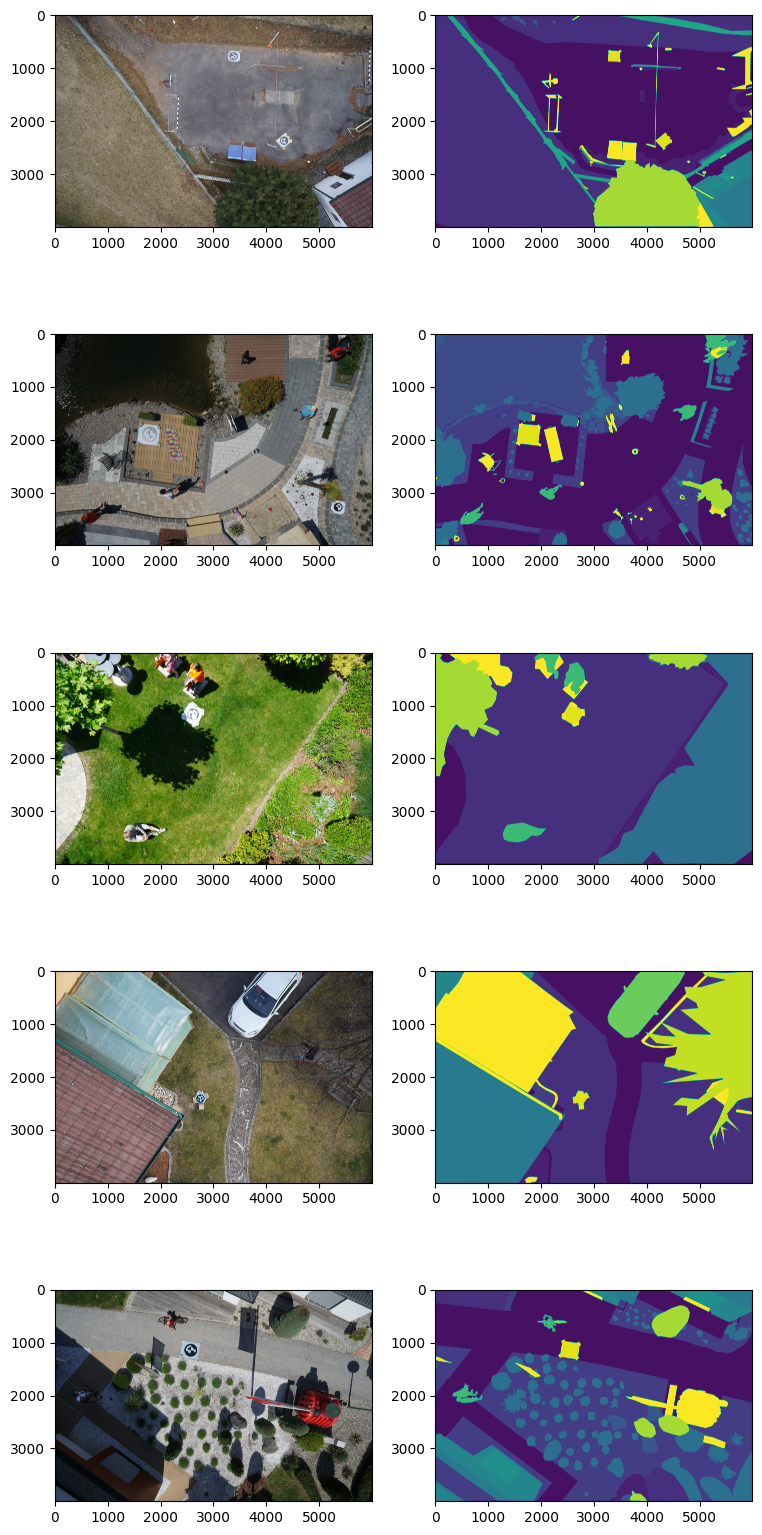

In [ ]:
# 5 pairs of original and label images from the validation data
from PIL import Image
n_max_imgs = 5

plt.figure(figsize = (9, 20))
for n in range(n_max_imgs):

    image = Image.open(val_images[n])
    image = np.array(image)

    label = Image.open(val_annotations[n])
    label = np.array(label)

    plt.subplot(n_max_imgs, 2, 2 * n + 1)
    plt.imshow(image)

    plt.subplot(n_max_imgs, 2, 2 * n + 2)
    plt.imshow(label)

1/1 [==============================] - 0s 23ms/step


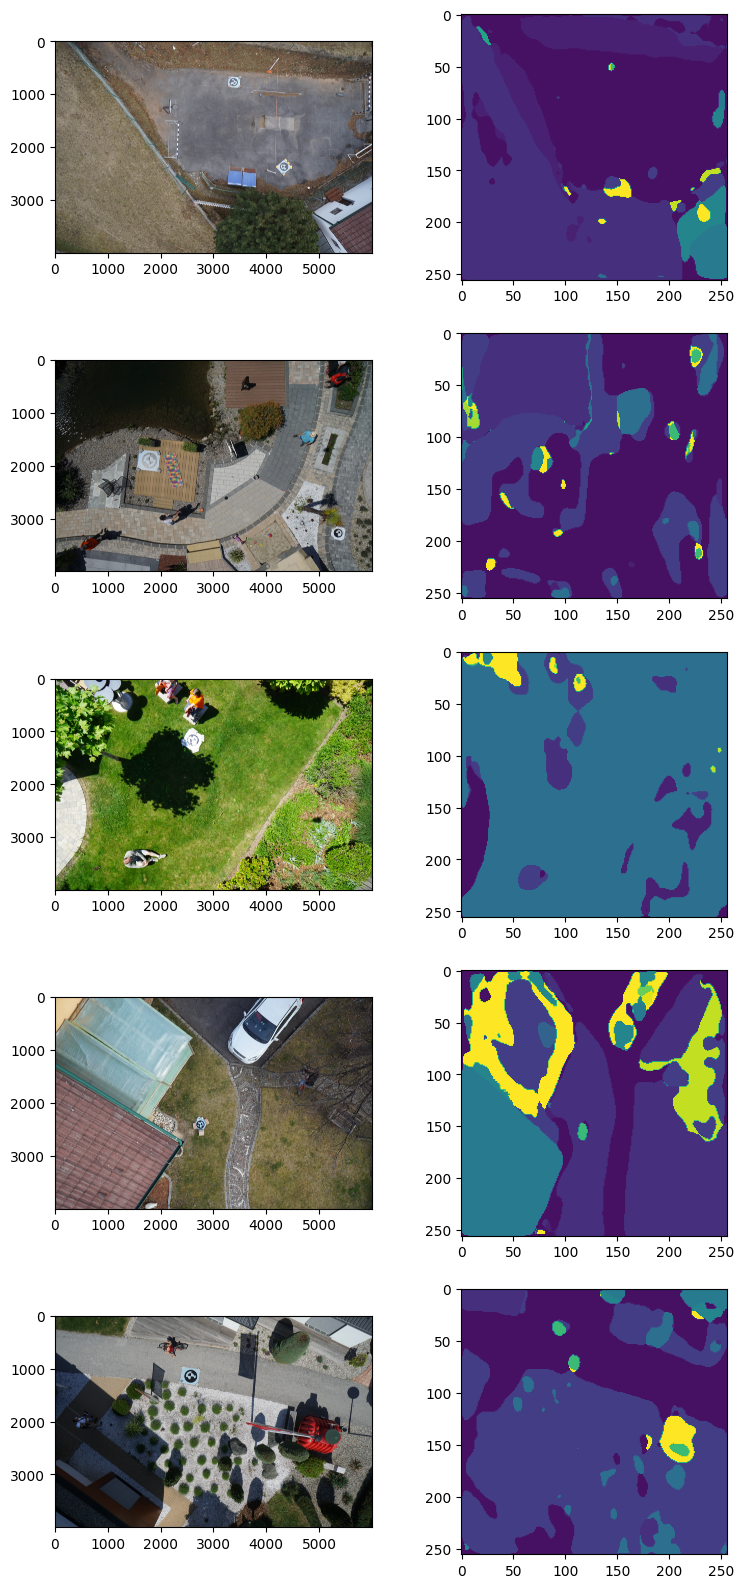

In [ ]:
# 5 pairs of original and predicted images from the validation data
n_max_imgs = 5

plt.figure(figsize = (9, 20))
for n in range(n_max_imgs):

    image = Image.open(val_images[n])
    image = np.array(image)

    label = model.predict_segmentation(
            inp = val_images[n],
            out_fname = '/tmp/pred.jpg', overlay_img = True, show_legends = True,
            class_names = class_list)

    plt.subplot(n_max_imgs, 2, 2 * n + 1)
    plt.imshow(image)

    plt.subplot(n_max_imgs, 2, 2 * n + 2)
    plt.imshow(label)

In [ ]:
model.save(f'{working_directory}/segnet512_512')

In [ ]:
model.save('segnet_512_512.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
